In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import sns as sns
import torch
import torch.optim as optim
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import svm
from tqdm import tqdm


In [271]:
### Load the data
seed = 1
data_path = 'data/output/data_complete_grouped_2022-06-22.csv'
df = pd.read_csv(data_path)

In [272]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
M = scaler.fit_transform(df.drop(columns=['dataset']))
#M = df.drop(columns=['dataset']).to_numpy()
#y = M[:,-1]
y = df['Thermal feeling (global)'].to_numpy() + 1
X = M[:,:-1]
#X = M

In [273]:
from sklearn.utils import class_weight

class_weights=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y),y=y)
class_weights=torch.tensor(class_weights,dtype=torch.float)
class_weights

tensor([1.2511, 0.8012, 1.0498])

In [274]:
from sklearn.model_selection import train_test_split


In [275]:
from sklearn.model_selection import KFold
test_accuracies = {}
train_accuracies = {}

for gamma in tqdm(np.arange(0.01, 1, 0.1)):
    # {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
    clf = svm.SVC(kernel='rbff',gamma=gamma, class_weight='balanced', max_iter=100000)
    train_accuracies[gamma] = {}
    test_accuracies[gamma] = {}

    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        #f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        #Train
        cm = confusion_matrix(y_train, clf.predict(X_train))
        #sns.heatmap(cm, annot=True, fmt='.2f', ax=ax1)

        train_acc = np.trace(cm)/np.sum(cm)
        train_accuracies[gamma][i] = train_acc


        # Test
        cm = confusion_matrix(y_test, clf.predict(X_test))
        #sns.heatmap(cm, annot=True, fmt='.2f', ax=ax2)
        test_acc = np.trace(cm)/np.sum(cm)
        test_accuracies[gamma][i] = test_acc
        #plt.show()
        #print(f'Train accuracy: {train_acc}, Test accuracy: {test_acc}')



100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


In [276]:
df_test = pd.DataFrame(test_accuracies)

In [277]:
df_train = pd.DataFrame(train_accuracies)

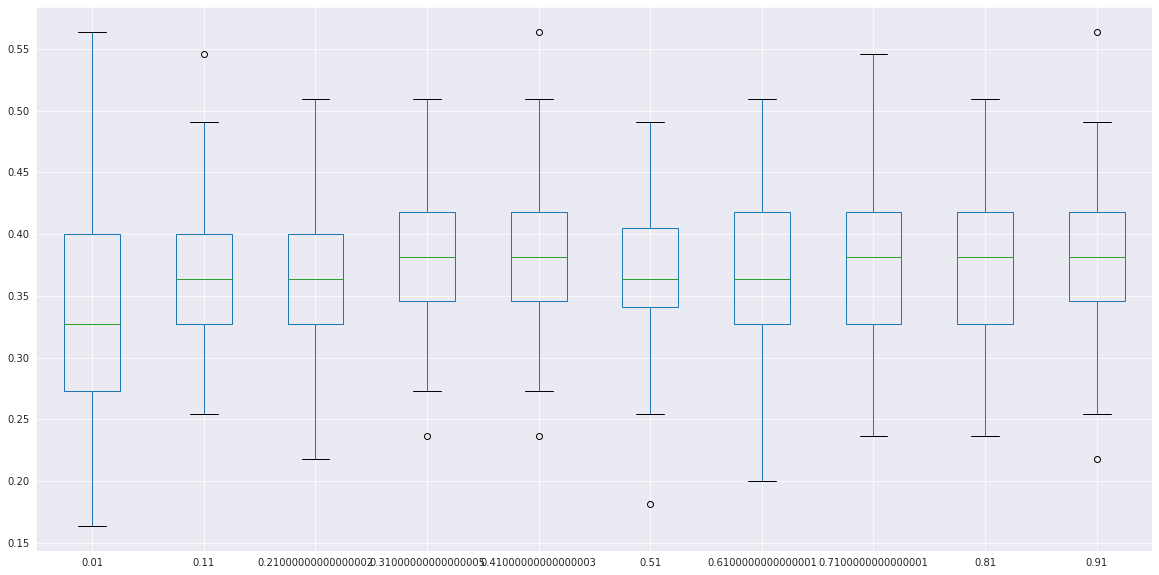

In [278]:
df_test.boxplot(figsize=(20,10))
plt.show()